# Tarea: Implementación del Algoritmo DBSCAN en un Jupyter Notebook

### Por Víctor Maldonado García
### Ramo: Inteligencia Artificial Universidad de la Serena

#### Paso 1: Carga de datos.
Se elige un conjunto de datos adecuado.
Para esta tarea elegí un dataset que muestra la información básica sobre los clientes en un mall como el Customer ID (La identificación del cliente), la edad, el género, el ingreso anual y el puntaje de gasto (Spending Score).

In [15]:
# Importamos las librerías necesarias para el análisis
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import imageio
from IPython.display import Image
import pandas as pd

# Cargar el conjunto de datos
data = pd.read_csv('Mall_Customers.csv')

#### Paso 2: Exploración de Datos
Antes de aplicar DBSCAN, es importante realizar un análisis exploratorio de los datos para comprender su distribución y características. Esto también nos ayudará a seleccionar los hiperparámetros del modelo.

Cabecera de datos:
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


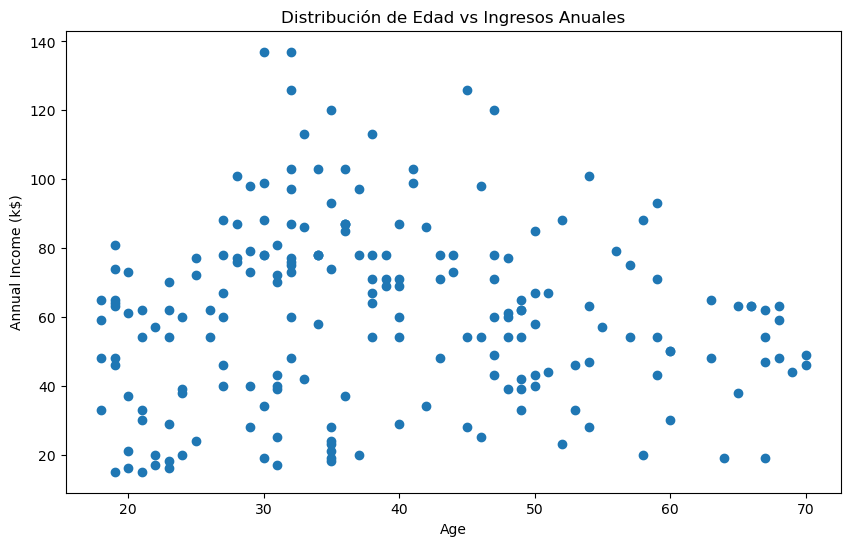

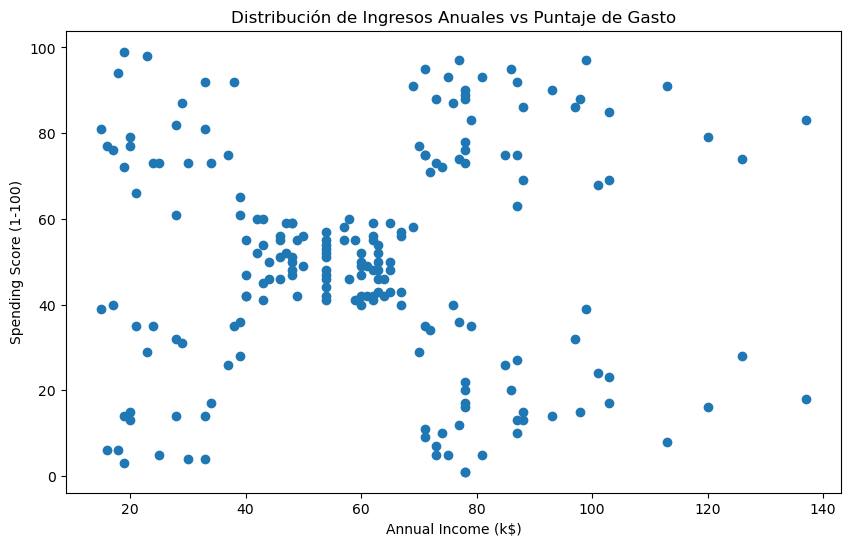

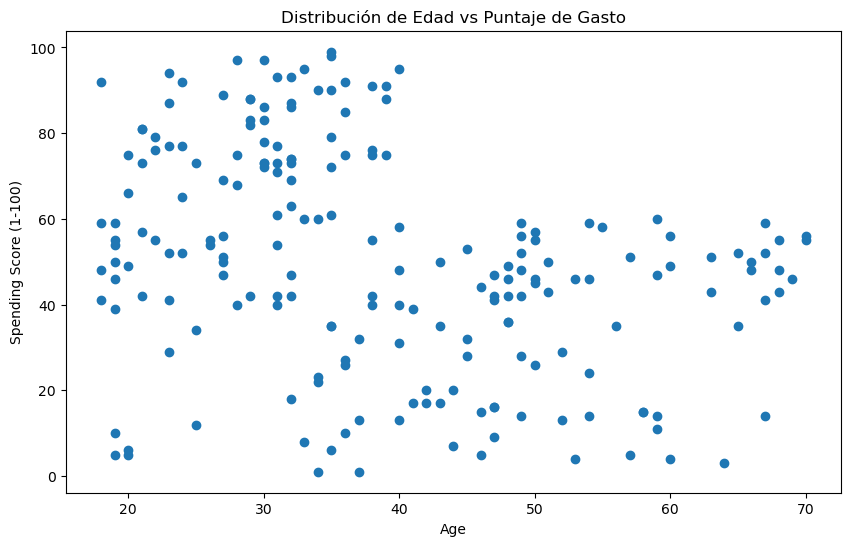

In [17]:
# Exploración de datos
print("Cabecera de datos:")
print(data.head())

# Visualización de distribución de datos
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['Annual Income (k$)'])
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Distribución de Edad vs Ingresos Anuales')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Distribución de Ingresos Anuales vs Puntaje de Gasto')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['Spending Score (1-100)'])
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Distribución de Edad vs Puntaje de Gasto')
plt.show()


#### Paso 3: Preprocesamiento
En esta etapa, si es necesario, normalizaremos los datos.

Ya que el conjunto de datos contiene columnas categóricas que no pueden ser convertidas a valores numéricos directamente hay que manejar adecuadamente estas columnas categóricas antes de aplicar la normalización.
Se puede aplicar la técnica de codificación one-hot, que convierte cada categoría en una columna binaria. Sin embargo, dado que DBSCAN no se ve afectado por la escala de las características, podemos simplemente omitir estas columnas categóricas para este ejercicio.

Se ajustará el preprocesamiento para eliminar las columnas categóricas y luego continuaremos con la implementación de DBSCAN.

In [20]:
# Preprocesamiento (normalización)
from sklearn.preprocessing import StandardScaler

# Eliminar columnas categóricas
data_numeric = data.drop(columns=['Genre'])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_numeric)


#### Paso 4: Implementación de DBSCAN
Ahora implementaremos DBSCAN utilizando sklearn.cluster.DBSCAN. Ajustaremos los hiperparámetros eps y min_samples basados en el análisis exploratorio realizado anteriormente.

In [21]:
from sklearn.cluster import DBSCAN

# Ajuste de hiperparámetros
eps = 0.3  # Se ajusta este valor según la distribución de tus datos
min_samples = 5  # Se ajusta este valor según la cantidad de datos

# Aplicar DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(scaled_data)


#### Paso 5: Visualización
Ahora visualizaremos los clusters identificados por DBSCAN.

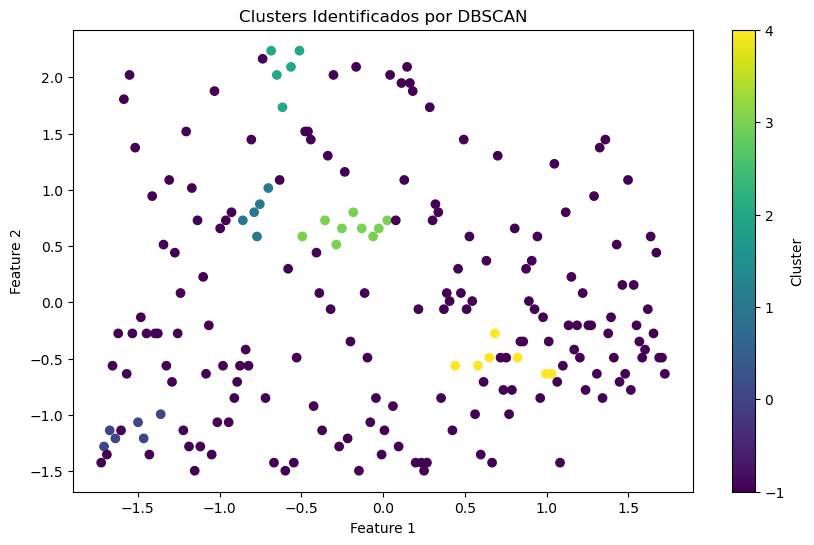

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clusters Identificados por DBSCAN')
plt.colorbar(label='Cluster')
plt.show()


#### Paso 6: Interpretación y Discusión
En esta etapa, se hablará cómo DBSCAN agrupó los datos y la pertinencia del método en función de los resultados obtenidos.

In [23]:
# Contar el número de clusters y los puntos ruidosos
num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
num_noise_points = list(clusters).count(-1)

print(f'Número de clusters: {num_clusters}')
print(f'Número de puntos ruidosos: {num_noise_points}')


Número de clusters: 5
Número de puntos ruidosos: 168


DBSCAN identificó 5 clusters distintos en los datos. Cada uno de estos clusters representa un grupo de puntos que están cerca unos de otros en el espacio de características. Cada punto en el mismo cluster es considerado como parte de la misma agrupación.

DBSCAN también identificó 168 puntos como ruido u outliers. Estos son puntos que no se asignaron a ningún cluster específico y son considerados como atípicos porque no cumplen con los criterios de proximidad de DBSCAN (es decir, no están lo suficientemente cerca de ningún otro punto para formar parte de un cluster).

#### 7. Prueba adicional con iteraciones
Quiero visualizar como se verían distintos valores de eps y min_samples para determinar cómo afectan los resultados del clustering.

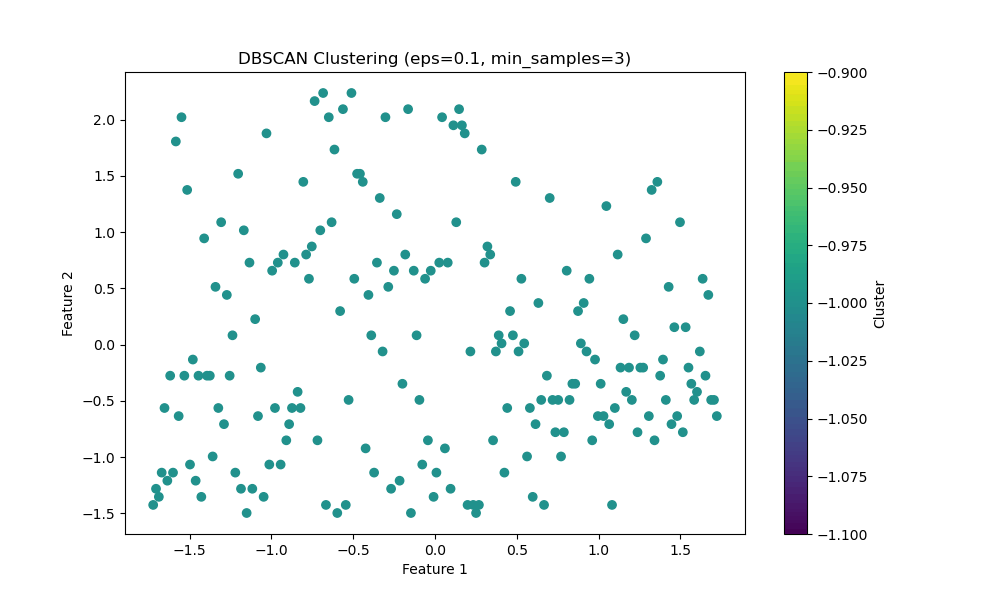

In [25]:
#from sklearn.cluster import DBSCAN
#mport matplotlib.pyplot as plt
#import numpy as np
import os
import imageio
from IPython.display import Image, display

# Crear un directorio para guardar las imágenes
os.makedirs('dbscan_images', exist_ok=True)

# Valores de eps y min_samples a probar
eps_values = [0.1, 0.2, 0.3, 0.4]
min_samples_values = [3, 5, 7]

# Iterar sobre diferentes combinaciones de eps y min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        # Aplicar DBSCAN
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(scaled_data)

        # Visualizar clusters
        plt.figure(figsize=(10, 6))
        plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=clusters, cmap='viridis')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title(f'DBSCAN Clustering (eps={eps}, min_samples={min_samples})')
        plt.colorbar(label='Cluster')

        # Guardar la imagen
        plt.savefig(f'dbscan_images/dbscan_eps_{eps}_min_samples_{min_samples}.png')
        plt.close()

# Crear el GIF
images = []
for eps in eps_values:
    for min_samples in min_samples_values:
        images.append(imageio.imread(f'dbscan_images/dbscan_eps_{eps}_min_samples_{min_samples}.png'))

imageio.mimsave('dbscan_clusters.gif', images, duration=1.5)

# Mostrar el GIF en el notebook
display(Image(filename='dbscan_clusters.gif'))